In [1]:
import pickle

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import matplotlib.pyplot as plt
import numpy as np

from qutip import mesolve
from scipy.interpolate import CubicSpline

from modules.atom_config import RbAtom
from modules.ketbra_config import RbKetBras


In [2]:
# Load the pkl file
with open(
        "calibrate_raman_pulses/rl/saved_data/double_fd_raman/78p02fnx/double_fd_raman_78p02fnx_524160.pkl",
        "rb") as f:
    data = pickle.load(f)

# Unpack real and imaginary parts for both Omega_1 and Omega_2
real_1, imag_1, real_2, imag_2, _, _ = data

# Convert to numpy arrays
real_1 = np.array(real_1)
imag_1 = np.array(imag_1)
real_2 = np.array(real_2)
imag_2 = np.array(imag_2)

# Time setup
t_final = 0.25  # Set this to your desired final time
num_points = len(real_1)
t_list_rl = np.linspace(0, t_final, num_points)
t_list_sim = np.linspace(0, t_final, 1000)

# Compute complex Rabi frequencies
omega_1 = real_1 + 1j * imag_1
omega_2 = real_2 + 1j * imag_2

# Compute amplitude and phase
amp_1 = np.abs(omega_1)
phase_1 = np.angle(omega_1)

amp_2 = np.abs(omega_2)
phase_2 = np.angle(omega_2)

# Generate cubic spline interpolators
spline_amp_1 = CubicSpline(t_list_rl, amp_1)
spline_phase_1 = CubicSpline(t_list_rl, phase_1)
spline_amp_2 = CubicSpline(t_list_rl, amp_2)
spline_phase_2 = CubicSpline(t_list_rl, phase_2)

# Sample the splines at higher resolution (1000 points)
amp_1_interp = spline_amp_1(t_list_sim)
phase_1_interp = spline_phase_1(t_list_sim)
amp_2_interp = spline_amp_2(t_list_sim)
phase_2_interp = spline_phase_2(t_list_sim)

In [3]:
#List the groundstates to be included in the simulation

atomStates = {
    "g1M": 0,
    "g1": 1,
    "g1P": 2,  # F=1,mF=-1,0,+1 respectively
    "g2MM": 3,
    "g2M": 4,
    "g2": 5,
    "g2P": 6,
    "g2PP": 7  # F=2,mF=-2,..,+2 respectively
}

'''
atomStates = {
    "g1M": 0,
    "g2MM": 1,
}'''



# List the excited levels to include in the simulation. the _d1 levels correspond to the D1 line levels, the other levels are by default the d2 levels
xlvls = [
#'x0',
#'x1M','x1','x1P',
#'x2MM','x2M','x2','x2P','x2PP',
#'x3MMM', 'x3MM','x3M','x3','x3P','x3PP', 'x3PPP',
#'x1M_d1','x1_d1','x1P_d1',
#'x2MM_d1','x2M_d1','x2_d1','x2P_d1','x2PP_d1'
]

#configure the atm state dictionary such that it includes the desired excited states, this includes the desired ground and excited states as arguments,
# as well as a boolean for whether to include the photonic Hilbert space

kb_class=RbKetBras(atomStates, xlvls, False)

#precompute ketbras for speed
ketbras=kb_class.getrb_ketbras()

In [4]:
#specify system b field groundstate splitting in MHz
bfieldsplit = '0p07'
#configure rb atom with desired CG coefficients and splittings
rb_atom = RbAtom(bfieldsplit, kb_class)

rotation_number=2
det_centre=-100000

#maybe make this a list to run through
amp_scaling=1.0
pulse_length=0.25

In [5]:
#first laser is always from F=2 and second from F=1


if rotation_number==2:
    cg_1=rb_atom.CG_d1g2x1
    pol_1="pi"
    det_zeeman_1=0

    cg_2=rb_atom.CG_d1g1Px1
    pol_2="sigmaM"
    det_zeeman_2=rb_atom.deltaZ

    psi_0= 1/np.sqrt(2)*(kb_class.get_ket_atomic('g2')-kb_class.get_ket_atomic('g2MM'))
    psi_des= 1/np.sqrt(2)*(kb_class.get_ket_atomic('g1P')-kb_class.get_ket_atomic('g2MM'))

    coherence_indices=[2,3]





[42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45

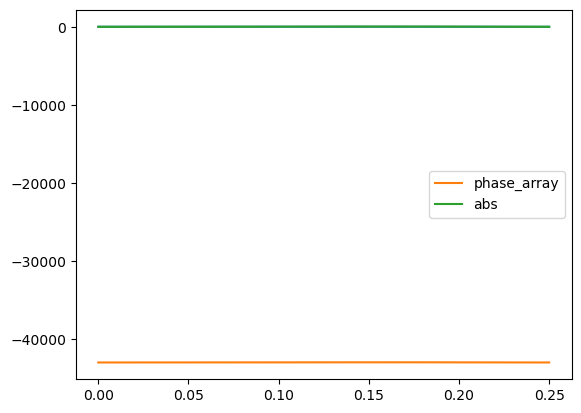

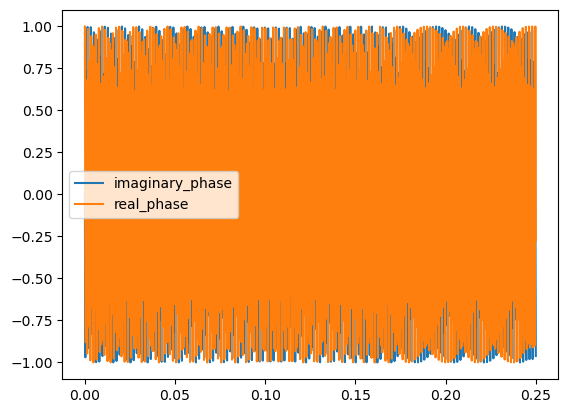

[42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45

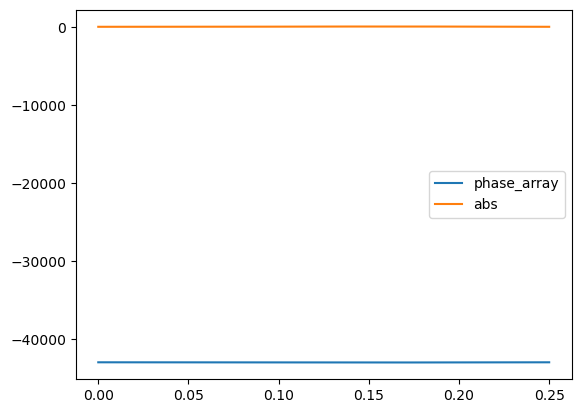

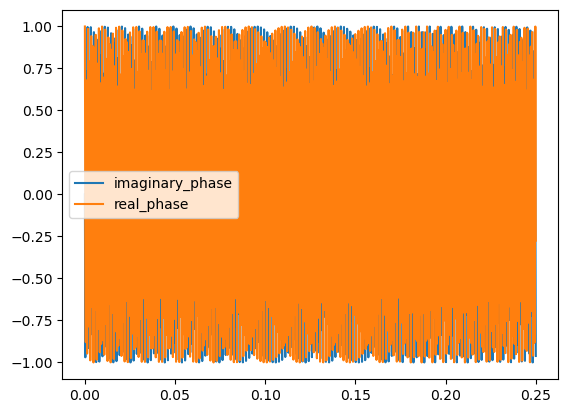

[42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57736007 42943.57736007 42943.57736007
 42943.57736007 42943.57

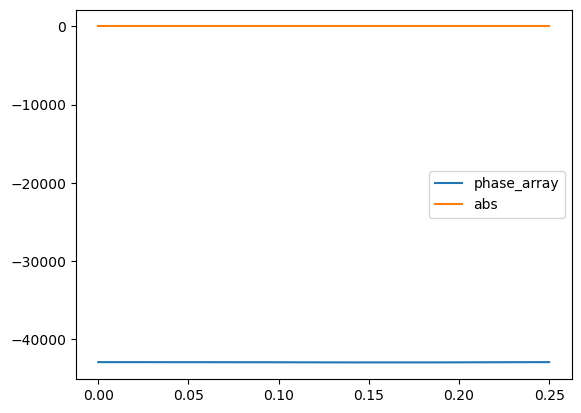

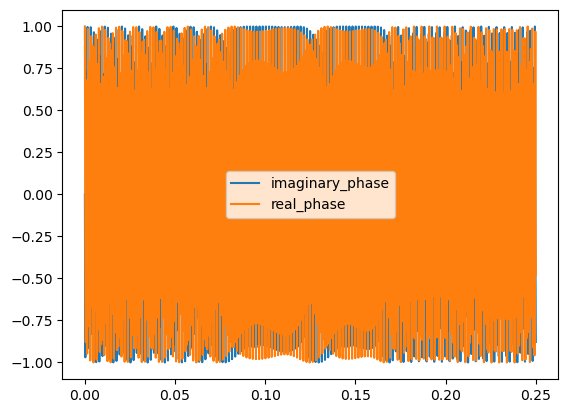

[42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45700601 42944.45700601 42944.45700601
 42944.45700601 42944.45

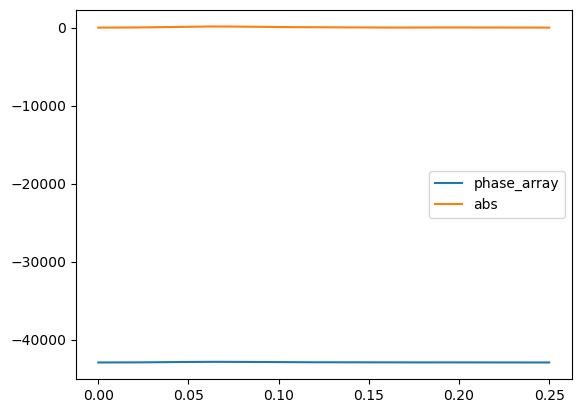

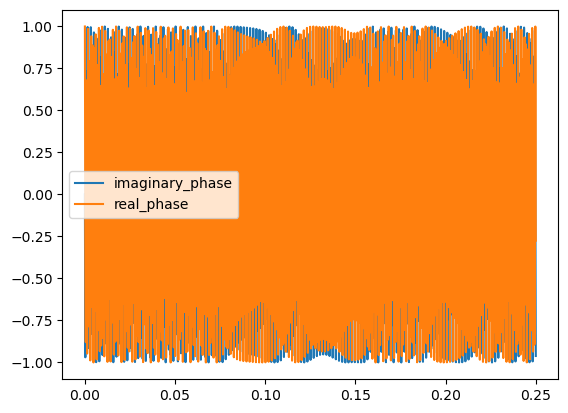

[42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69771413 42942.69771413 42942.69771413
 42942.69771413 42942.69

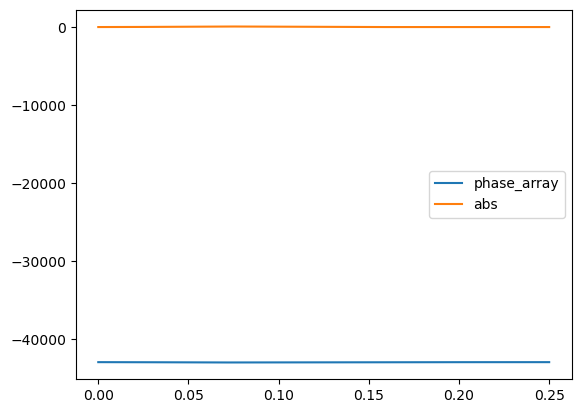

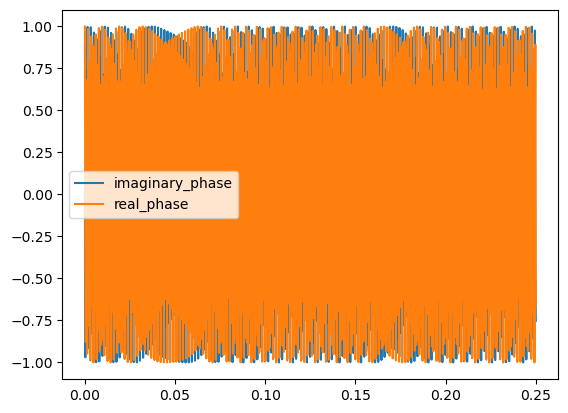

[1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189
 1.75929189 1.75929189 1.75929189 1.75929189 1.75929189 1.7592

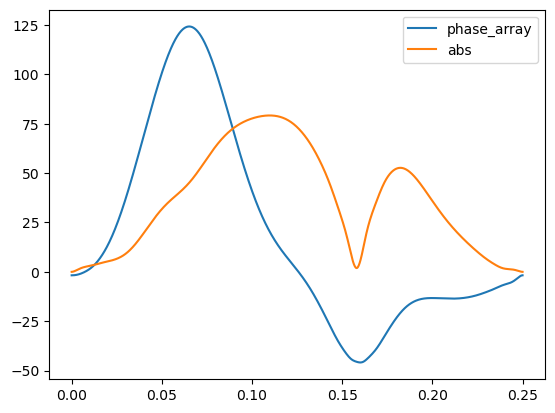

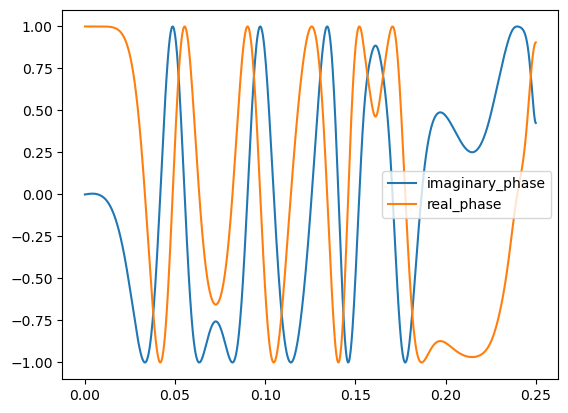

[-42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.5

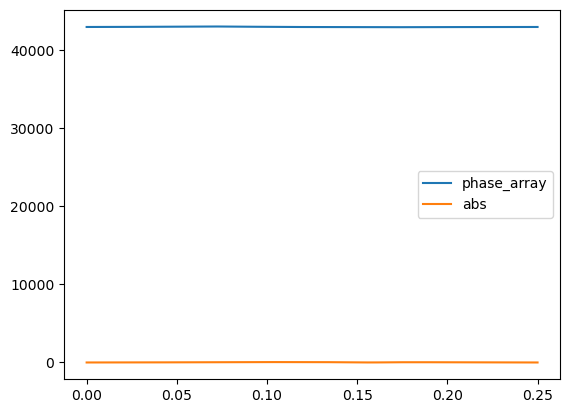

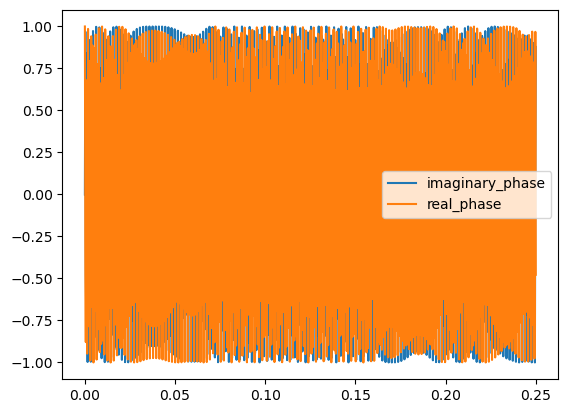

[0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.8796

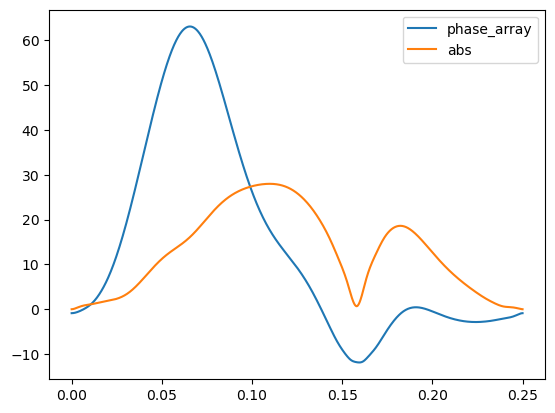

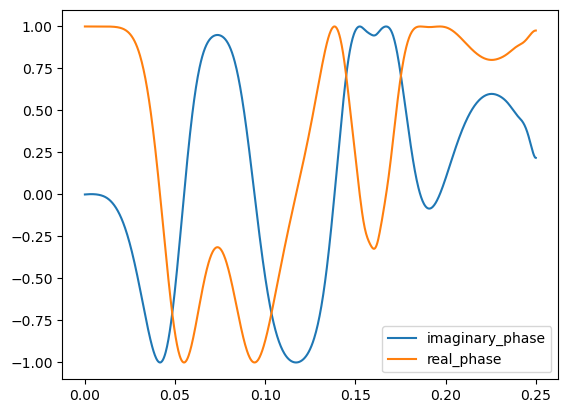

[-42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.5

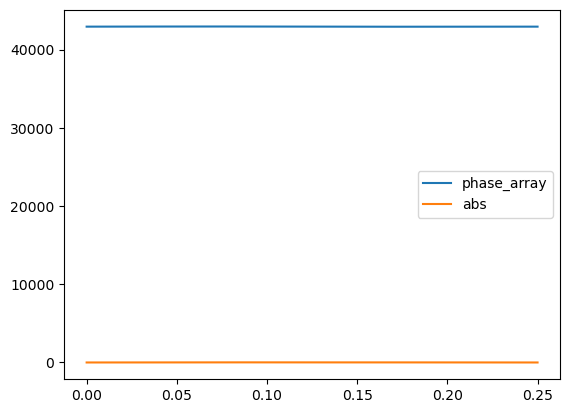

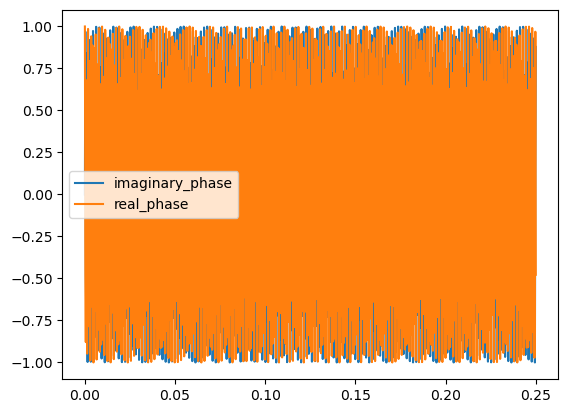

[0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594
 0.87964594 0.87964594 0.87964594 0.87964594 0.87964594 0.8796

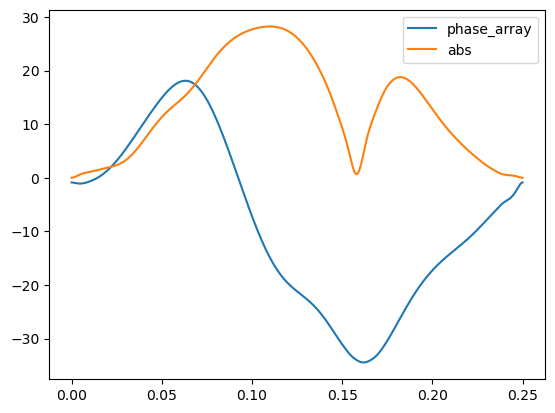

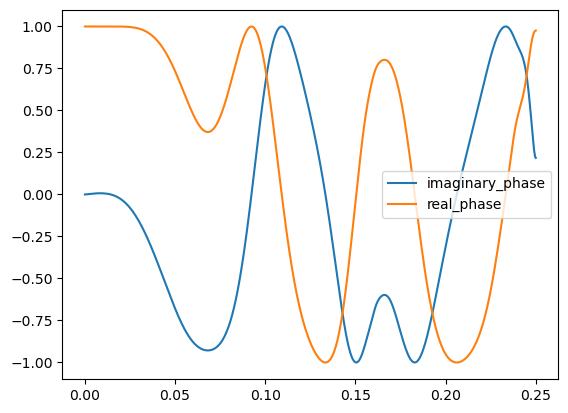

[-42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.57736007 -42943.57736007 -42943.57736007
 -42943.57736007 -42943.5

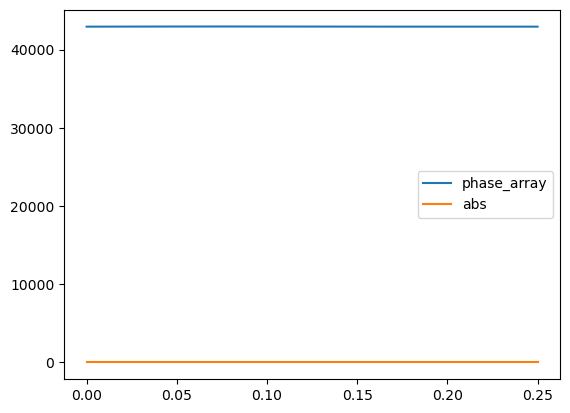

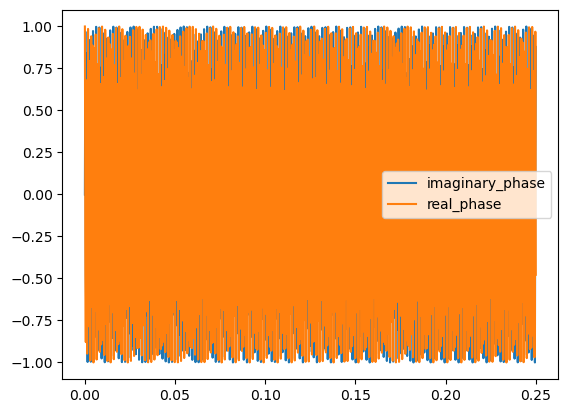

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

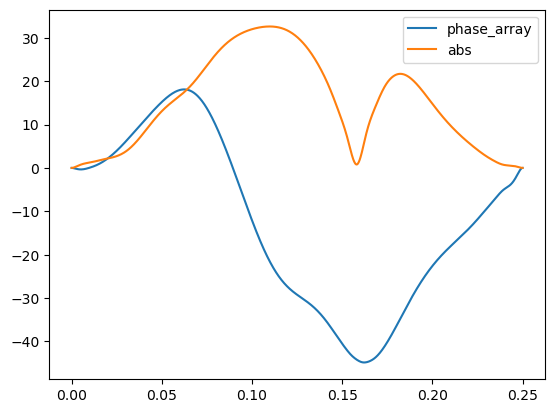

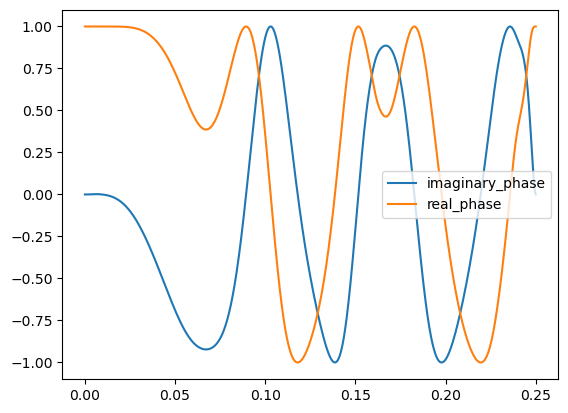

[-42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.6

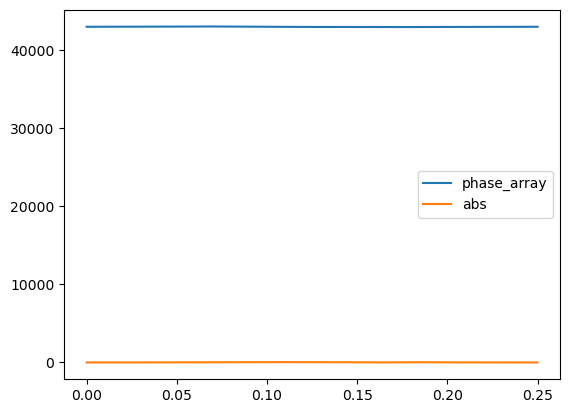

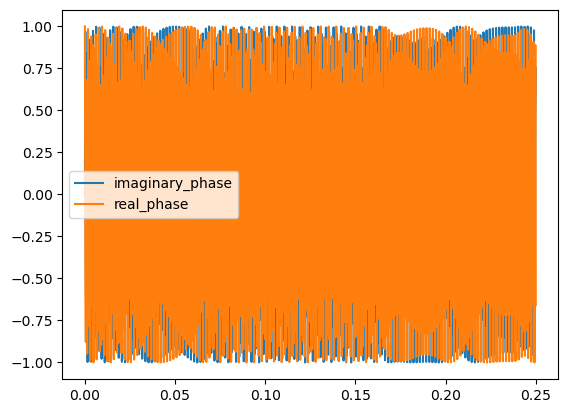

[-85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2

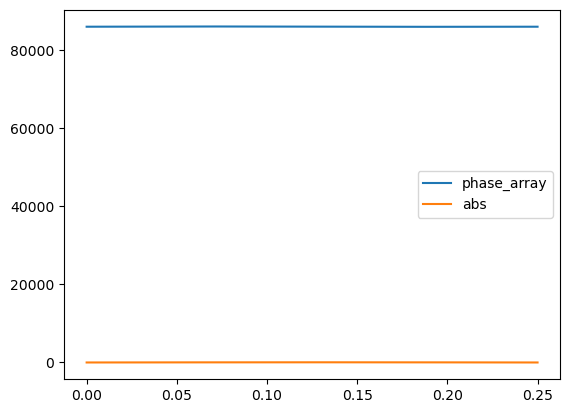

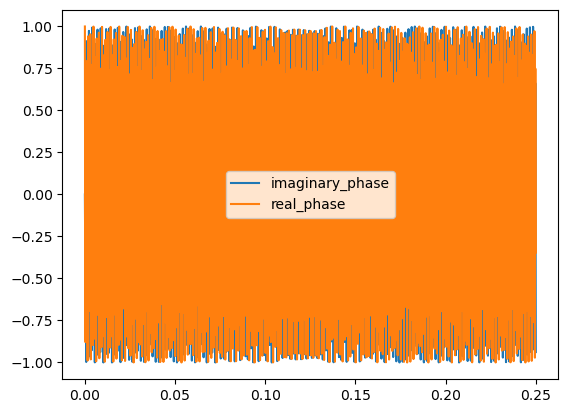

[-42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.6

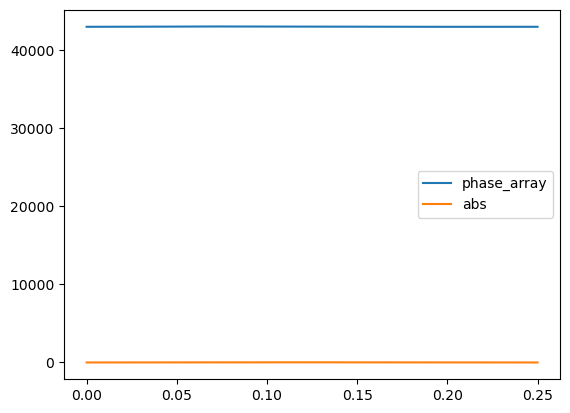

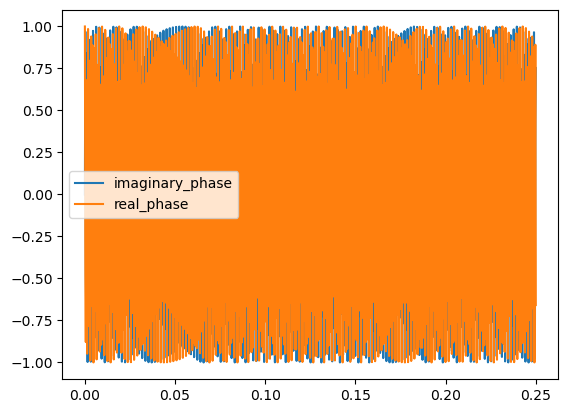

[-85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2750742 -85886.2750742 -85886.2750742
 -85886.2750742 -85886.2

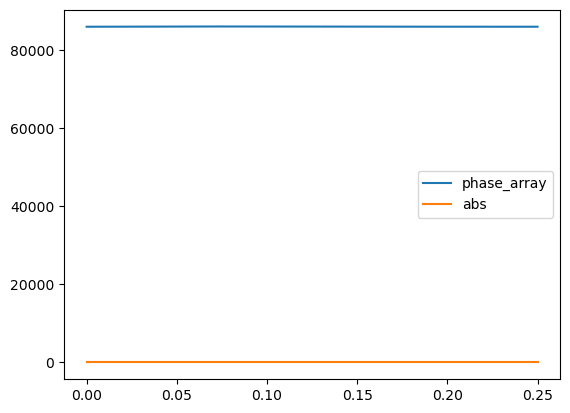

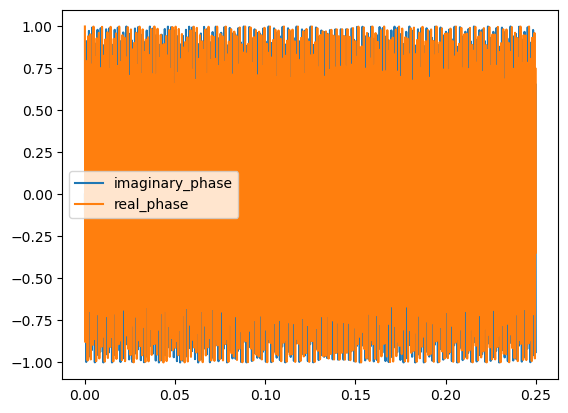

[-42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.6

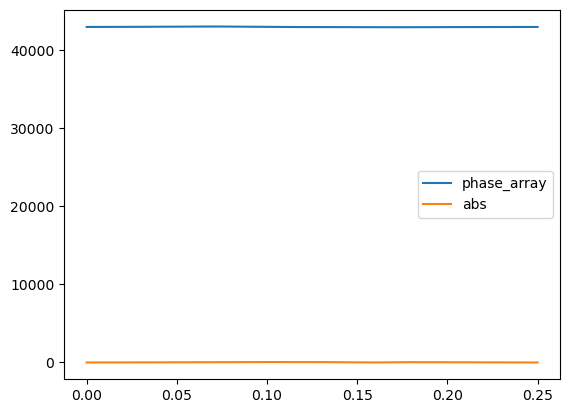

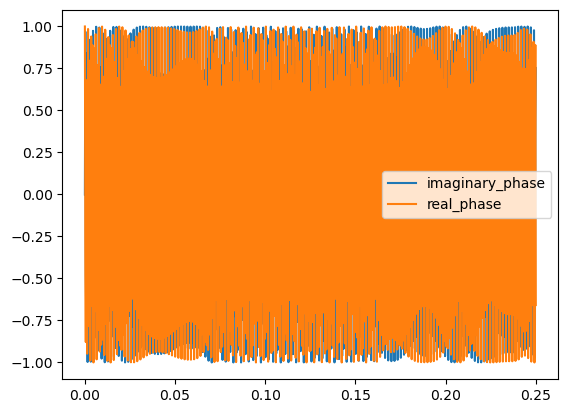

[-42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.69771413 -42942.69771413 -42942.69771413
 -42942.69771413 -42942.6

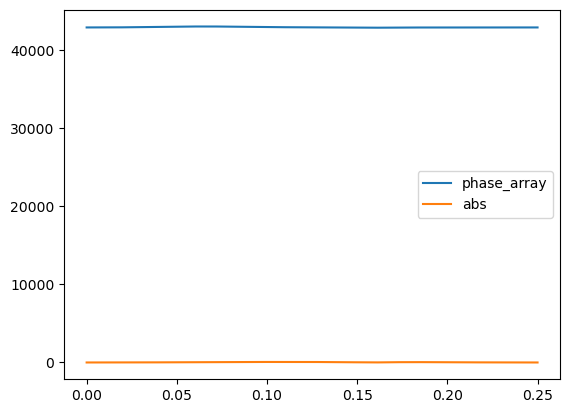

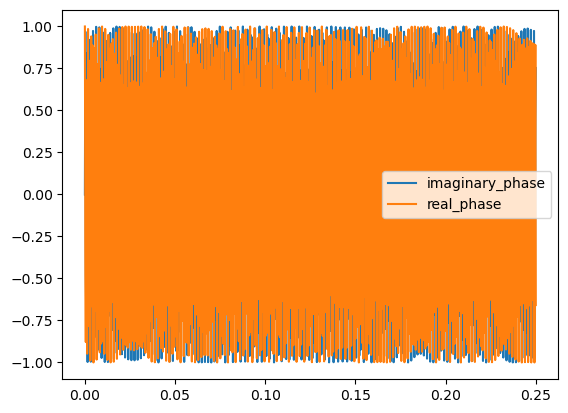

In [6]:
#Define the laser pulse parameters
two_phot_det=0.0
#The pulse is a flattop pulse with a blackman window
pulse_time=np.linspace(0,pulse_length,1000)
pulse_1=amp_1_interp
#pulse_1, pulse_2=create_blackman(pulse_time, 0,1, 1)
det_1=(det_centre*2*np.pi)+det_zeeman_1
amp_1=amp_scaling*np.sqrt(2*np.abs(det_centre))*2*np.pi

pulse_2=amp_2_interp
plt.plot(pulse_time, pulse_2)
det_2=det_1-two_phot_det*2*np.pi-rb_atom.getrb_gs_splitting()+det_zeeman_2
amp_2=amp_scaling*np.sqrt(2*np.abs(det_centre))*2*np.pi

ham, args=rb_atom.gen_H_FarDetuned_Raman_PulsePair_D1(ketbras, atomStates, det_1, det_2,pol_1, pol_2, amp_1, amp_2,pulse_time, pulse_1, pulse_2, _phase_1=phase_1_interp, _phase_2=phase_2_interp)

#add decay ops
c_op_list=[]
c_op_list+=rb_atom.spont_em_ops_far_detuned(atomStates,pol_1,amp_1,det_1)
c_op_list+=rb_atom.spont_em_ops_far_detuned(atomStates,pol_2,amp_2,det_2)

In [7]:
output_mesolve = mesolve(ham, psi_0, pulse_time, c_op_list)

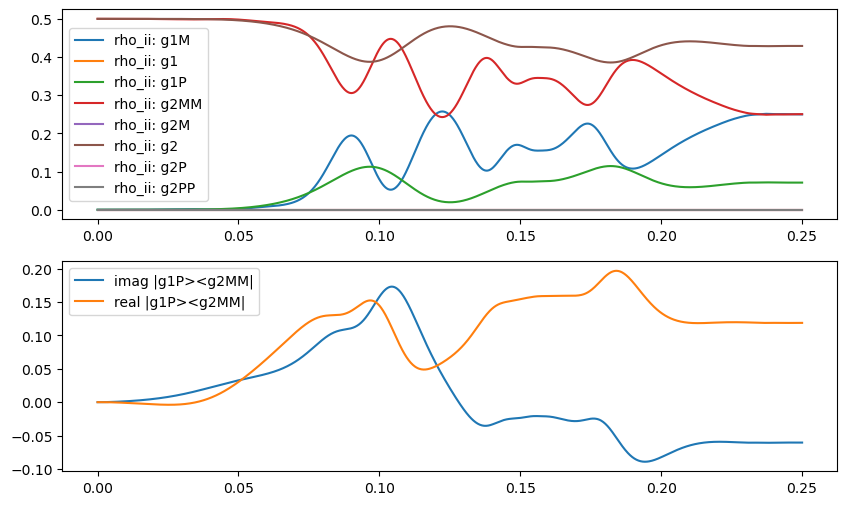

In [8]:
#for mesolve solver
fig, axes = plt.subplots(2, 1, figsize=(10,6))
state_labels = list(atomStates.keys())
for i in range(8):
    axes[0].plot(pulse_time, [
        np.real(output_mesolve.states[x][i][0][i])
        for x in range(len(pulse_time))
    ],
                 label=f"rho_ii: {state_labels[i]}")


axes[1].plot(pulse_time, [np.imag(output_mesolve.states[x][coherence_indices[0]][0][coherence_indices[1]]) for x in range(len(pulse_time))], label=f"imag |{state_labels[coherence_indices[0]]}><{state_labels[coherence_indices[1]]}|")
axes[1].plot(pulse_time, [np.real(output_mesolve.states[x][coherence_indices[0]][0][coherence_indices[1]]) for x in range(len(pulse_time))], label=f"real |{state_labels[coherence_indices[0]]}><{state_labels[coherence_indices[1]]}|")

axes[0].legend()
axes[1].legend()


In [9]:
#print max of every state in time
for i in range(4):
    print(
        f"max of {state_labels[i]}: {np.max([np.real(output_mesolve.states[x][i][0][i]) for x in range(len(pulse_time))])}"
    )
    #print(f"max of {state_labels[i]}: {np.max([np.imag(output_mesolve.states[x][i][0][i]) for x in range(len(pulse_time))])}")

#print time to max for every state
for i in range(4):
    print(
        f"time to max of {state_labels[i]}: {pulse_time[np.argmax([np.real(output_mesolve.states[x][i][0][i]) for x in range(len(pulse_time))])]}"
    )
    #print(f"time to max of {state_labels[i]}: {pulse_time[np.argmax([np.imag(output_mesolve.states[x][i][0][i]) for x in range(len(pulse_time))])]}")

max of g1M: 0.25737804468664677
max of g1: 2.3260442953235697e-06
max of g1P: 0.11437292365359363
max of g2MM: 0.4999999999999999
time to max of g1M: 0.12237237237237238
time to max of g1: 0.08883883883883884
time to max of g1P: 0.18218218218218218
time to max of g2MM: 0.0
